In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random Selection

In [ ]:
mornings = make_array('wake up', 'sleep in')

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings, 7)

In [ ]:
sum(np.random.choice(mornings, 7) == 'wake up')

## Control Statements: `For`

In [ ]:
for day in make_array('Monday', 'Tuesday', 'Wednesday'):
    decision = np.random.choice(mornings)
    print('On ' + day + ' I decided to ' + decision)

In [9]:
grades = make_array("A", "B", "C", "D", "F")
names = make_array("Tom", "April", "Ron", "Jerry", "Ann", "Leslie")

for name in names:
    grade = np.random.choice(grades)
    if grade == "A":
        print(name + " got an A! Congrats, " + name + "!")
    elif grade == "B":
        print(name + " got a B! Congrats, " + name + "!")
    else:
        print(name + " did not get an A or B. Sorry, " + name + ". :(")
    

Tom got a B! Congrats, Tom!
April got a B! Congrats, April!
Ron did not get an A or B. Sorry, Ron. :(
Jerry got an A! Congrats, Jerry!
Ann got an A! Congrats, Ann!
Leslie did not get an A or B. Sorry, Leslie. :(


## Our game from last time

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

In [11]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    if my_roll < your_roll:
        return -1
    if my_roll == your_roll:
        return 0

In [14]:
die_faces = np.arange(1,7)
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [15]:
simulate_one_round()

1

In [16]:
results = make_array()

results = np.append(results, simulate_one_round())
results

array([-1.])

In [18]:
results = make_array()
number_of_rounds = 10

for i in np.arange(number_of_rounds):
    results = np.append(results, simulate_one_round())
    
len(results)

10

In [20]:
winnings = sum(results)
winnings

-4.0

In [37]:
results = make_array()
number_of_rounds = 10000

for i in np.arange(number_of_rounds):
    results = np.append(results, simulate_one_round())

if sum(results) > 0:
    print('I won ' + str(sum(results)) + "! :)")
else:
    print('I lost ' + str(-sum(results)) + "... :(")

I won 35.0! :)


## Visualizing Simluations

In [45]:
outcomes = Table().with_columns('Outcomes', results)
outcomes.group('Outcomes')

Outcomes,count
-1,4153
0,1659
1,4188


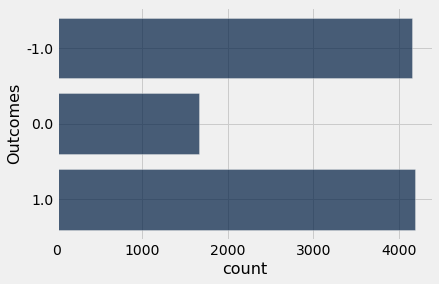

In [44]:
outcomes.group('Outcomes').barh('Outcomes')

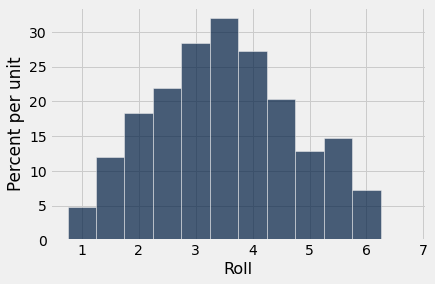

In [84]:
avg_of_rolls = make_array()
num_simulations = 500

for i in np.arange(num_simulations):
    rolls = np.random.choice(die_faces, 2)
    avg_of_rolls = np.append(avg_of_rolls, np.average(rolls))
    
Table().with_column("Roll", avg_of_rolls).hist("Roll", bins = np.arange(.75,7,.5))

## Simulation

In [ ]:
coin = make_array('heads', 'tails')

In [ ]:
np.random.choice(coin)

In [ ]:
np.random.choice(coin, 10)

In [ ]:
np.random.choice(coin, 10) == 'heads'

In [ ]:
sum(np.random.choice(coin, 10) == 'heads')

In [ ]:
# How can we do a simulation of 100 coin tosses, 
# count the number of heads, and
# repeat this 10,000 times?

In [ ]:
# 1. Simulate one outcome

def heads_in_100_tosses():
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# 2. Decide how many times you want to simluate

num_simulations = 10000

In [ ]:
# 3. Simulate that many outcomes

outcomes = make_array()

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_100_tosses())

In [ ]:
heads = Table().with_columns('Heads', outcomes)
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Probability

Counting rule

Multiplication rule

Addition rule

Complement rule

## Monty Hall

In [63]:
doors = make_array('car', 'first goat', 'second goat')

In [64]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [65]:
other_goat('first goat')

'second goat'

In [66]:
other_goat('wheeler hall')

In [67]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [68]:
monty_hall()

['car', 'first goat', 'second goat']

In [69]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [70]:
games.append(monty_hall())

Guess,Revealed,Remaining
second goat,first goat,car


In [71]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car


In [72]:
games.group('Remaining')

Remaining,count
car,2006
first goat,491
second goat,503


In [73]:
games.group('Guess')

Guess,count
car,994
first goat,1005
second goat,1001
